In [3]:
%run rs2th_functions.ipynb

In [4]:
# RG 1.60
ft = np.array([0.10,  2.50, 9.00, 33.0, 100.0]);  # frequency table
rt = np.array([0.07,  3.13, 2.61,  1.0,   1.0]);  # response spectrum table

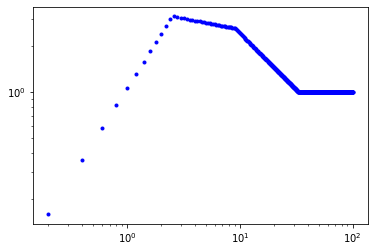

In [5]:
tmax = 5; fmax=100;
dt = 1/(2*fmax); t = np.arange(0,tmax+dt,dt)
## frequency table 작성
Nt = len(t); df = fmax/(Nt//2);
freq = np.arange(df, fmax+df, df);
## log-log interpolation
rs = 10**np.interp(np.log10(freq),np.log10(ft),np.log10(rt));
plt.loglog(freq,rs,'b.');

In [6]:
th = np.random.random(len(t));
An = np.zeros(len(rs));
freq,rs_syn = srs_iso(freq,th,0.05,dt);

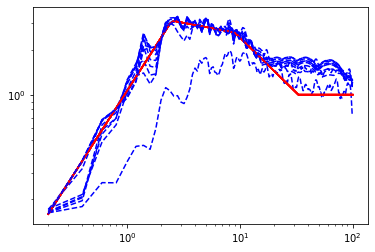

In [7]:
for k in range(10):
    for i in range(len(freq)):
        An[i] = rs[i]/rs_syn[i];
    ft_th = np.fft.fft(th);
    ft_th[:Nt//2] *= An
    ft_th[-(Nt//2):] *= np.flip(An);
    th = np.fft.ifft(ft_th)
    freq,rs_syn = srs_iso(freq,th,0.05,dt);
    plt.loglog(freq,rs,'r-');
    plt.loglog(freq,rs_syn,'b--');

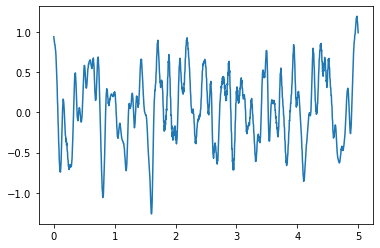

In [10]:
plt.plot(t,th.real);

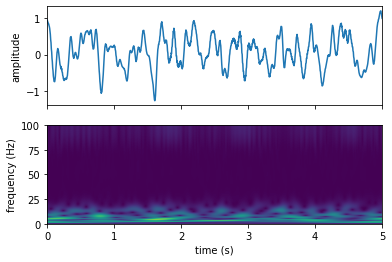

In [38]:
th = th.real;
fmin = 0  # Hz
fmax = 100  # Hz
fmin_samples = int(fmin/df)
fmax_samples = int(fmax/df)
stock = st.st(th, fmin_samples, fmax_samples)
extent = (t[0], t[-1], fmin, fmax)

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(t, th)
ax[0].set(ylabel='amplitude')
ax[1].imshow(np.abs(stock), origin='lower', extent=extent)
ax[1].axis('tight')
ax[1].set(xlabel='time (s)', ylabel='frequency (Hz)')
plt.show()

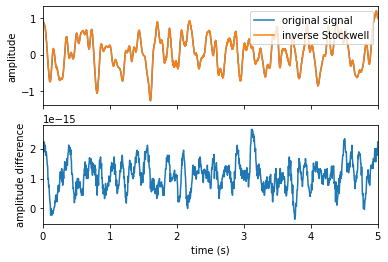

In [39]:
inv_stock = st.ist(stock, fmin_samples, fmax_samples)
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(t, th, label='original signal')
ax[0].plot(t, inv_stock, label='inverse Stockwell')
ax[0].set(ylabel='amplitude')
ax[0].legend(loc='upper right')
ax[1].plot(t, th - inv_stock)
ax[1].set_xlim(0, 5)
ax[1].set(xlabel='time (s)', ylabel='amplitude difference')
plt.show()

In [40]:
freq.shape

(500,)

In [43]:
stock[1:,:].shape

(500, 1001)

In [66]:
X,Y = np.meshgrid(freq,t); Z = np.abs(np.transpose(stock[1:,:]));


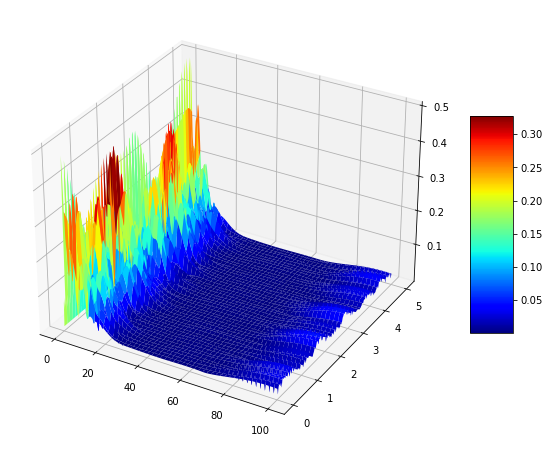

In [83]:
fig = plt.figure(figsize=(10,8))
ax3d = plt.axes(projection='3d')
surf = ax3d.plot_surface(X, Y, Z,cmap='jet');
fig.colorbar(surf,shrink=0.5,aspect=5);

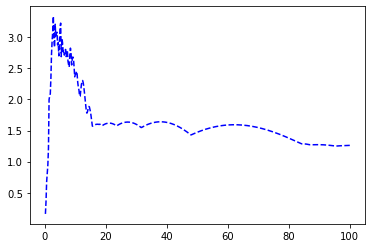

In [68]:
plt.plot(freq,rs_syn,'b--');

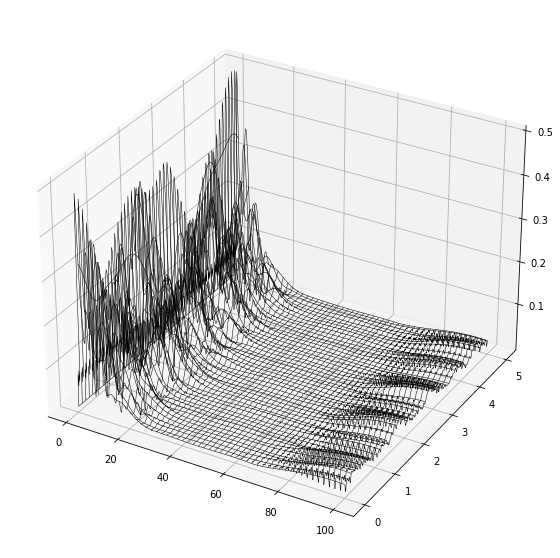

In [81]:
fig = plt.figure(figsize=(20,10))
ax3d = plt.axes(projection='3d')
ax3d.plot_wireframe(X, Y, Z,color='black',lw=0.5);